In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('full_data.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df_work = pd.get_dummies(df['work_type'],drop_first=True,prefix='work')
df_smoking = pd.get_dummies(df['smoking_status'],drop_first=True,prefix='smoke')
df = pd.concat([df,df_work,df_smoking],axis=1)
df.drop(['work_type','smoking_status'],axis=1,inplace=True)

In [17]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'work_Private',
       'work_Self-employed', 'work_children', 'smoke_formerly smoked',
       'smoke_never smoked', 'smoke_smokes'],
      dtype='object')

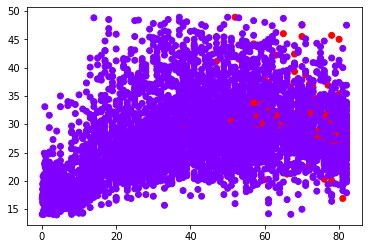

In [25]:
plt.scatter(df['age'],df['bmi'], c = df['stroke'], cmap = 'rainbow')

In [4]:
x = df.drop('stroke',axis=1)
y = df['stroke']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [6]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [7]:
y_pred = svc_model.predict(x_test)
y_pred[10:15]

array([0, 0, 0, 0, 0], dtype=int64)

In [8]:
y_test[10:15]

3689    0
1647    0
2997    0
1873    0
3865    0
Name: stroke, dtype: int64

In [9]:
accuracy_score(y_test,y_pred)

0.9498495486459378

In [10]:
confusion_matrix(y_test,y_pred)

array([[947,   0],
       [ 50,   0]], dtype=int64)

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



C:\Users\SK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
y_pred_train = svc_model.predict(x_train)
y_pred_train[10:15]

array([0, 0, 0, 0, 0], dtype=int64)

In [13]:
y_train[10:15]

651     0
2145    0
2785    0
3055    0
4622    0
Name: stroke, dtype: int64

In [14]:
accuracy_score(y_train,y_pred_train)

0.9503012048192772

In [15]:
confusion_matrix(y_train,y_pred_train)

array([[3786,    0],
       [ 198,    0]], dtype=int64)

In [16]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3786
           1       0.00      0.00      0.00       198

    accuracy                           0.95      3984
   macro avg       0.48      0.50      0.49      3984
weighted avg       0.90      0.95      0.93      3984



C:\Users\SK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
